# Carbon Intensity Dataset Analysis

## *Assignment 5 - Group 5*

#### *In the following, we, as group 5, have tried to inspect and understand the Product Carbon Foodprint (PCF) Dataset, and also using this dataset, our goal was to analyze the data and report significant differences in carbon intensity (CI) of products across sectors and regions or countries and value chain stages.*

![Image of Footprint](https://www.enoplan.de/wp-content/uploads/2023/06/Footprint.png)g

### Import required Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

***This dataset is related to a research on the same topic around The Carbon Catalogue, carbon footprints of 866 commercial products from 8 industry sectors and 5 continents***

***You can find the link to article [here.](https://www.nature.com/articles/s41597-022-01178-9)***


In [4]:
df = pd.read_excel("C:\\Users\\ASUS\\OneDrive\\Desktop\\CarbonCatalogueDataDescriptor_v30Oct2021.xlsx").convert_dtypes()
# Remove '*' and convert column names to lowercase
df.columns = df.columns.str.replace('*', '', regex=False).str.lower()
numeric_columns = [
    'upstream co2e (fraction of total pcf)', 
    'operations co2e (fraction of total pcf)', 
    'downstream co2e (fraction of total pcf)'
]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.head(1)

,pcf-id,year of reporting,stage-level co2e available,product name (and functional unit),product detail,company,country (where company is incorporated),company's gics industry group,company's gics industry,company's sector,...,relative change in pcf vs previous,company-reported reason for change,change reason category,%upstream estimated from %operations,upstream co2e (fraction of total pcf),operations co2e (fraction of total pcf),downstream co2e (fraction of total pcf),transport co2e (fraction of total pcf),endoflife co2e (fraction of total pcf),adjustments to raw data (if any)
0,10056-1-2014,2014,Yes,Frosted Flakes(R) Cereal,"Frosted Flakes(R), 23 oz., Produced in Lancast...",Kellogg Company,USA,"Food, Beverage & Tobacco",Food Products,Food & Beverage,...,(not reported by company),N/a,N/a (no %change reported),No,0.575,0.3,0.125,0.045,(included in downstream but not reported separ...,Divided stage and total emissions by 1000 (bas...


### Inspection and Exploratory Data Analysis (EDA)

In [6]:
df.shape

(866, 25)

We have 25 columns and 866 data entries in rows.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   pcf-id                                     866 non-null    string 
 1   year of reporting                          866 non-null    Int64  
 2   stage-level co2e available                 866 non-null    string 
 3   product name (and functional unit)         866 non-null    string 
 4   product detail                             856 non-null    string 
 5   company                                    866 non-null    string 
 6   country (where company is incorporated)    866 non-null    string 
 7   company's gics industry group              866 non-null    string 
 8   company's gics industry                    866 non-null    string 
 9   company's sector                           866 non-null    string 
 10  product weight (kg)       

Carbon itensity is a float column, as we should expect.

In [5]:
null_values = np.where(pd.isnull(df))
null_values

(array([  3,   4,   5, ..., 865, 865, 865], dtype=int64),
 array([24, 24, 24, ..., 20, 21, 24], dtype=int64))

Can see from visiual inspection that these are all in column 24, which provides details to adjustments to the raw data. Therefore the null values are not a concern.

In [9]:
df.describe()

,year of reporting,product weight (kg),"product's carbon footprint (pcf, kg co2e)",carbon intensity,upstream co2e (fraction of total pcf),operations co2e (fraction of total pcf),downstream co2e (fraction of total pcf)
count,866.0,866.0,866.0,866.0,421.000000,421.000000,421.000000
mean,2014.762125,2806.548993,15815.246783,34.252968,0.445245,0.231332,0.323425
std,1.23672,34405.725655,181373.291657,84.599082,0.308126,0.259239,0.337878
min,2013.0,0.00127,0.0004,0.11,0.000100,0.000000,0.000000
25%,2014.0,1.0,7.0,1.32,0.155500,0.030200,0.005500
50%,2015.0,15.899207,111.1,5.4,0.440500,0.126000,0.221000
75%,2016.0,1000.0,1600.0,26.0,0.680300,0.325700,0.595400
max,2017.0,600000.0,3718044.0,973.22,0.998100,0.990900,0.999900


The .describe method provides us with information on the numerical column and their values which could come handy in the next steps!

### Inspection on Categorical Features

#### Company's Sector

In [11]:
unique_items = df["company's sector"].unique()
counts = df["company's sector"].value_counts()
sorted_counts = counts.reset_index()
sorted_counts.columns = ["company's sector", "counts"]
sorted_unique_items = sorted_counts["company's sector"].values
sorted_values = sorted_counts["counts"].values

print(counts)

company's sector
Computer, IT & telecom                  253
Food & Beverage                         139
Home durables, textiles, & equipment    122
Chemicals                               116
Automobiles & components                 75
Construction & commercial materials      67
Comm. equipm. & capital goods            56
Packaging for consumer goods             38
Name: count, dtype: Int64


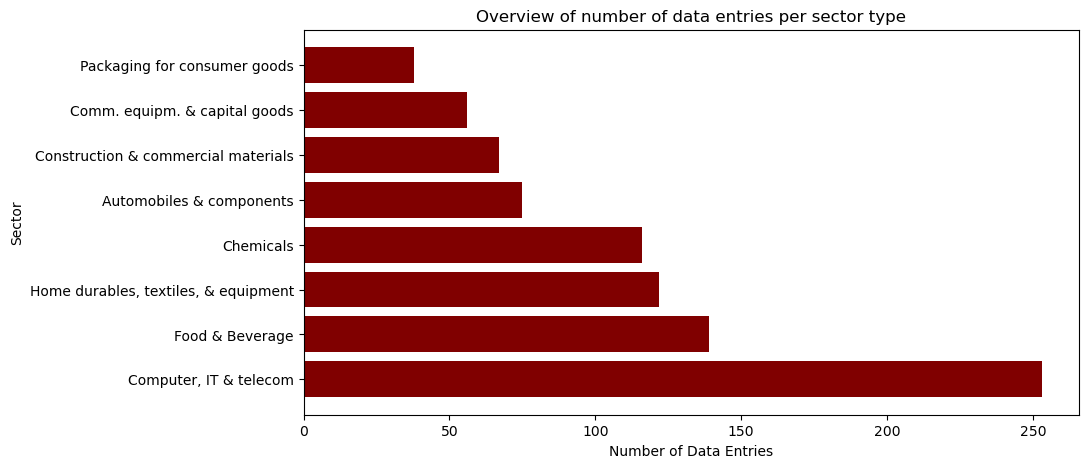

In [12]:
fig = plt.figure(figsize = (10, 5))
plt.barh(sorted_unique_items, sorted_values, color ='maroon', height=0.8, align='center')
plt.xlabel("Number of Data Entries")
plt.ylabel("Sector")
plt.title("Overview of number of data entries per sector type")
plt.show()

***Sectors like Computer, IT & Telecom and, Food & Beverage are the most frequent sectors in this dataset***

#### Countries

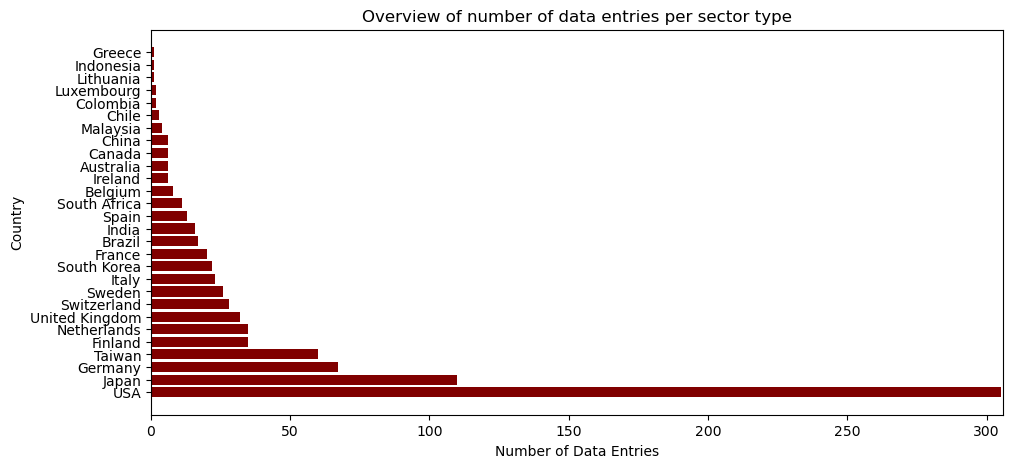

In [13]:
unique_items_country = df["country (where company is incorporated)"].unique()
counts_country = df["country (where company is incorporated)"].value_counts()
sorted_counts_country = counts_country.reset_index()
sorted_counts_country.columns = ["country (where company is incorporated)", "counts_country"]
sorted_unique_items_country = sorted_counts_country["country (where company is incorporated)"].values
sorted_values_country = sorted_counts_country["counts_country"].values

fig = plt.figure(figsize = (11, 5))
plt.barh(sorted_unique_items_country, sorted_values_country, color ='maroon', height=0.8, align='center')
plt.xlabel("Number of Data Entries")
plt.ylabel("Country")
plt.title("Overview of number of data entries per sector type")
plt.xlim(00,306)
plt.show()

***USA is by far the most frequent country in this Dataset!***

## Helper Functions

***To provide an structured overview of all the functions and analyses, we gathered them all in a single cell and they are described and addressed through the file and in the following!***

In [15]:
# 1. Calculate average CI per sector
def calculate_average_ci(df, group_by="sector"):
    if group_by=="sector":
        return pd.DataFrame(df.groupby(
            "company's sector"
        )['carbon intensity'].mean()).round(2).sort_values(by='carbon intensity', ascending=False)
    elif group_by=='country':
        return pd.DataFrame(df.groupby(
            'country (where company is incorporated)'
            )['carbon intensity'].mean()).round(2).sort_values(by='carbon intensity', ascending=False)
    elif group_by=='stream':
        return pd.DataFrame(df.groupby('company\'s sector')[
        ['upstream co2e (fraction of total pcf)', 
         'operations co2e (fraction of total pcf)', 
         'downstream co2e (fraction of total pcf)']
        ].mean()).round(2).sort_values(by="company's sector", ascending=False)
    else:
        raise ValueError("Choose 'group_by' parameter as 'sector' or 'country' or 'stream'...!!!")


# 2. Perform ANOVA to check if differences in CI among sectors are statistically significant
def perform_anova(df, by='sector'):
    if by=="sector":
        by_groups = [df[df["company's sector"] == sector]['carbon intensity'] for sector in df["company's sector"].unique()]
        f_stat, p_value = f_oneway(*by_groups)
        return f_stat, p_value
    elif by=="country":
        by_groups = [
            df[df['country (where company is incorporated)'] == country]['carbon intensity']
            for country in df['country (where company is incorporated)'].unique()
        ]
        f_stat, p_value = f_oneway(*by_groups)
        return f_stat, p_value
    elif by=="stream":
        results = {}
        for sector in df['company\'s sector'].unique():
            subset = df[df['company\'s sector'] == sector]
            f_stat, p_value = f_oneway(subset['upstream co2e (fraction of total pcf)'],
                                    subset['operations co2e (fraction of total pcf)'],
                                    subset['downstream co2e (fraction of total pcf)'],
                                    nan_policy = 'omit')
            # print(f_stat, p_value)
            results[sector] = (f_stat, p_value)
        return pd.DataFrame(results).T
    else:
        raise ValueError("Choose 'group_by' parameter as 'sector' or 'country' or 'stream'...!!!")

# 3. Visualize CI distribution per sector
def visualize_ci_distribution(df, by='sector'):
    plt.figure(figsize=(10, 6))
    if by=='sector':
        sns.boxplot(
            y="company's sector", 
            x='carbon intensity', 
            data=df
        )
        plt.title('Carbon Intensity Distribution by Sector')
        plt.ylabel('Sector')
        plt.xlabel('Carbon Intensity (kg CO2e/kg)')
        plt.tight_layout()
        plt.show()
    elif by=='country':
        sns.boxplot(
            y='country (where company is incorporated)', 
            x='carbon intensity',
            data=df
        )
        plt.title('Carbon Intensity Distribution by Country')
        plt.ylabel('Country')
        plt.xlabel('Carbon Intensity (kg CO2e/kg)')
        plt.tight_layout()
        plt.show()
    elif by=="stream":
        df_melted = df.melt(id_vars='company\'s sector', 
                            value_vars=[
                                'upstream co2e (fraction of total pcf)', 
                                'operations co2e (fraction of total pcf)', 
                                'downstream co2e (fraction of total pcf)'],
                            var_name='Value Chain Stage', value_name='Contribution')
        plt.figure(figsize=(12, 6))
        sns.barplot(y='company\'s sector', x='Contribution', hue='Value Chain Stage', data=df_melted, palette='Set2')
        plt.title('Average Carbon Intensity Contributions by Value Chain Stage Within Sectors')
        plt.ylabel('Contribution (fraction of total CI)')
        plt.xlabel('Sector')
        plt.tight_layout()
        plt.show()
    else:
        raise ValueError("Choose 'group_by' parameter as 'sector' or 'country' or 'stream'...!!!")        


# 4. Identify overlapping CI ranges
def identify_overlapping_ranges(df):
    stats = df.groupby("company's sector")['carbon intensity'].agg(['min', 'max']).reset_index()
    overlap = []
    for i, sector_a in stats.iterrows():
        for j, sector_b in stats.iterrows():
            if i >= j:
                continue
            if (
                sector_a['min'] <= sector_b['max']
                and sector_b['min'] <= sector_a['max']
            ):
                overlap.append((sector_a["company's sector"], sector_b["company's sector"]))
    return overlap

### 

## 1st Question:

#### 1.1 Are there significant differences in average CI among sectors?

- Yes, sectors typically show significant differences in average Carbon Intensity (CI) due to varying production processes, raw material usage, and value chain contributions.

- Method: Perform an Analysis of Variance (ANOVA) to check if sector means differ significantly.

In [16]:
# 1. Calculate average CI
avg_ci = calculate_average_ci(df)
avg_ci

,carbon intensity
company's sector,
Comm. equipm. & capital goods,106.04
"Computer, IT & telecom",75.29
Automobiles & components,21.6
"Home durables, textiles, & equipment",13.28
Chemicals,5.17
Food & Beverage,5.09
Packaging for consumer goods,1.28
Construction & commercial materials,1.18


**Using the functions defined earlier, we calculate the average value of Carbon Intensity between various sectors and then make use of the ANOVA test!**

In [17]:
# 2. Perform ANOVA
f_stat, p_value = perform_anova(df)
print(f"f_stat:{f_stat} , p_value: {p_value}")

f_stat:26.818165245662108 , p_value: 2.2201664774717847e-33


#### *The p-value (<0.05) indicates significant differences in carbon intensity among sectors.*

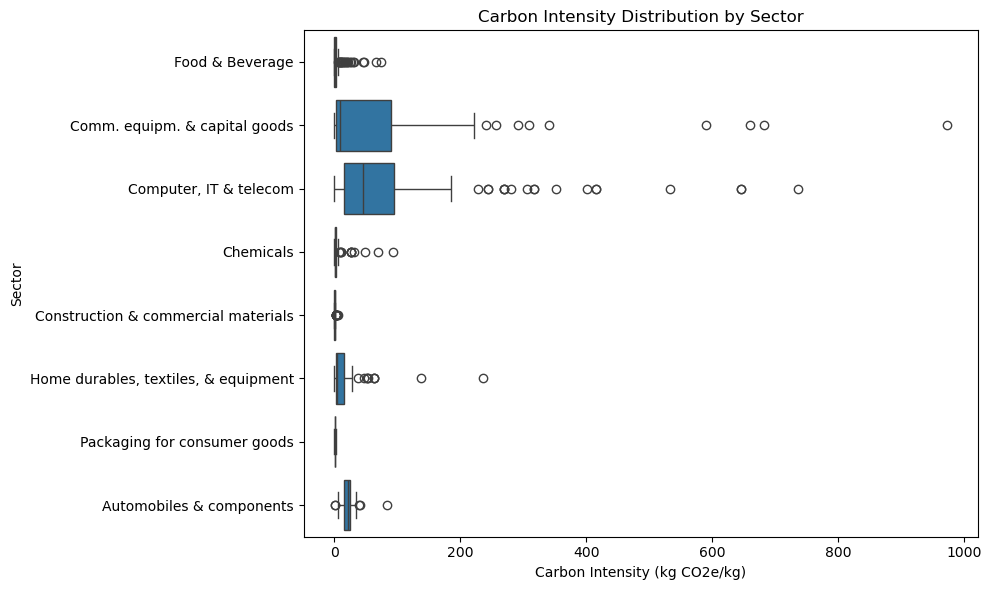

In [18]:
# 3. Visualize
visualize_ci_distribution(df)

#### 1.2 Which sectors differ significantly in their average CI?

##### Initial Insights (See Below Code)

- Sectors with High CI:

    - Comm. equipm. & capital goods (106.04): Extremely high due to the production complexity, heavy equipment, and operational energy use.
    - Computer, IT & telecom (75.29): High downstream CI from energy-intensive product usage (e.g., printers, servers).
- Sectors with Moderate CI:

    - Automobiles & components (21.60): Significant emissions from upstream material production and operational energy during use.
    - Home durables, textiles, & equipment (13.28): Emissions primarily from raw material processing and textile manufacturing.

- Sectors with Low CI:

    - Construction & commercial materials (1.18): Likely reflects efficiencies in large-scale, bulk production.
    - Packaging for consumer goods (1.28): Typically lighter-weight products with fewer manufacturing stages.


In [19]:
#Check Stats
df.groupby("company's sector")['carbon intensity'].agg(['min', 'max','mean','std']).reset_index()

,company's sector,min,max,mean,std
0,Automobiles & components,0.99,84.36,21.599867,10.563327
1,Chemicals,0.12,94.0,5.173017,12.471271
2,Comm. equipm. & capital goods,0.28,973.22,106.041607,200.043358
3,"Computer, IT & telecom",0.12,736.5,75.294625,104.393587
4,Construction & commercial materials,0.21,6.51,1.178955,1.136091
5,Food & Beverage,0.11,74.64,5.087266,11.21966
6,"Home durables, textiles, & equipment",0.4,235.91,13.283033,27.055704
7,Packaging for consumer goods,0.23,2.72,1.276053,0.673063


#### 1.3 Are there any sectors with overlapping CI ranges that make it difficult to distinguish their environmental performance?

##### Challenges in Environmental Performance Distinction:

- Wide Ranges within Sectors:
    - Sectors like Comm. Equip. & Capital Goods and Computer, IT & Telecom exhibit extreme CI variability, causing overlaps with both low-CI and high-CI sectors.

- Product Diversity:

    - Broad product categories (e.g., chemicals, capital goods) lead to overlaps as CI depends on product-specific characteristics.

- Shared Upstream Inputs:

    - Overlap between Chemicals and other sectors arises from common reliance on raw materials (e.g., fertilizers, synthetic polymers).

In [20]:
# 4. Identify Overlapping CI Ranges
overlapping_ranges = identify_overlapping_ranges(df)
overlapping_ranges

[('Automobiles & components', 'Chemicals'),
 ('Automobiles & components', 'Comm. equipm. & capital goods'),
 ('Automobiles & components', 'Computer, IT & telecom'),
 ('Automobiles & components', 'Construction & commercial materials'),
 ('Automobiles & components', 'Food & Beverage'),
 ('Automobiles & components', 'Home durables, textiles, & equipment'),
 ('Automobiles & components', 'Packaging for consumer goods'),
 ('Chemicals', 'Comm. equipm. & capital goods'),
 ('Chemicals', 'Computer, IT & telecom'),
 ('Chemicals', 'Construction & commercial materials'),
 ('Chemicals', 'Food & Beverage'),
 ('Chemicals', 'Home durables, textiles, & equipment'),
 ('Chemicals', 'Packaging for consumer goods'),
 ('Comm. equipm. & capital goods', 'Computer, IT & telecom'),
 ('Comm. equipm. & capital goods', 'Construction & commercial materials'),
 ('Comm. equipm. & capital goods', 'Food & Beverage'),
 ('Comm. equipm. & capital goods', 'Home durables, textiles, & equipment'),
 ('Comm. equipm. & capital g

#### *This list provides all the overlapping Carbon Intensity ranges!*

#### 1.4 What could be reasons of these differences if any?

| **Sector**                         | **CI Drivers**                                                                                   |
|------------------------------------|--------------------------------------------------------------------------------------------------|
| **Automobiles & Components**       | Energy-intensive manufacturing, use of steel/aluminum, high downstream emissions.               |
| **Chemicals**                      | Dependence on fossil fuels, emissions from raw material extraction and reactions.               |
| **Comm. Equip. & Capital Goods**   | Large, complex products with energy-intensive assembly and heavy operational energy use.        |
| **Computer, IT & Telecom**         | Complex supply chains, high upstream emissions from microchip and electronics production.       |
| **Construction Materials**         | Lower CI due to local material sourcing and simpler processes.                                  |
| **Food & Beverage**                | Significant upstream emissions from agriculture, lower operational energy use.                  |
| **Packaging for Consumer Goods**   | Lightweight products with minimal operational and downstream emissions.                        |


##  

## 2nd Question:

#### 2.1 Are there significant differences in average carbon intensity (CI) across countries represented in the dataset?


In [21]:
avg_ci_country_full = calculate_average_ci(df, group_by = 'country')
avg_ci_country_full

,carbon intensity
country (where company is incorporated),
Canada,370.15
Brazil,106.17
France,60.86
Malaysia,58.42
USA,45.09
Japan,44.83
China,44.59
Taiwan,29.1
South Korea,22.32


#### *The above function again calculates the average Carbon Intensity, but this time based on the different countries.*
***You can easily notice the huge gap between each country. It is most probably because of various focus and concentration of countries. For example main sector of Canada and Colombia are not necessarily the same!***

#### 2.2 Which countries differ significantly in their average CI?

1. **High Carbon Intensity (CI):**
   - **Canada (370.15):** Extremely high CI, possibly due to energy-intensive industries like oil sands extraction.
   - **Brazil (106.17):** Likely influenced by deforestation or specific high-impact agricultural or mining activities.
   - **USA (45.09), China (44.59), and Japan (44.83):** High CI likely due to their industrial production and reliance on fossil fuels.

2. **Low Carbon Intensity (CI):**
   - **Colombia (0.18), Chile (0.52), Lithuania (0.36):** Very low CI values, possibly due to a combination of clean energy usage and less industrialization.

3. **Moderate CI Values:**
   - Countries like **Germany (20.76), South Korea (22.32), and Netherlands (2.71)** fall into moderate CI ranges, likely reflecting a mix of industrial efficiency and energy policies.


In [22]:
df_canada = df.loc[df["country (where company is incorporated)"] == 'Canada']
df_canada["company's sector"]

177    Computer, IT & telecom
178    Computer, IT & telecom
179    Computer, IT & telecom
180    Computer, IT & telecom
181    Computer, IT & telecom
182    Computer, IT & telecom
Name: company's sector, dtype: string

In [23]:
df_brazil = df.loc[df["country (where company is incorporated)"] == 'Brazil']
df_brazil["company's sector"]

78     Construction & commercial materials
347          Comm. equipm. & capital goods
348          Comm. equipm. & capital goods
349          Comm. equipm. & capital goods
391                              Chemicals
392                              Chemicals
393                              Chemicals
394                              Chemicals
395                              Chemicals
396                              Chemicals
397                              Chemicals
398                              Chemicals
399                              Chemicals
400                              Chemicals
401                              Chemicals
402                              Chemicals
586                              Chemicals
Name: company's sector, dtype: string

#### *As also mentioned above, these various average CI values are because of different sectors that countries have invested in!*

#### **Statistical Insight:**
The **F-statistic of 6.32** and **p-value of 2.21e-20** strongly indicate that average CI differs significantly among countries. Further pairwise comparisons (e.g., Tukey’s test) can pinpoint the exact countries with statistically significant differences.

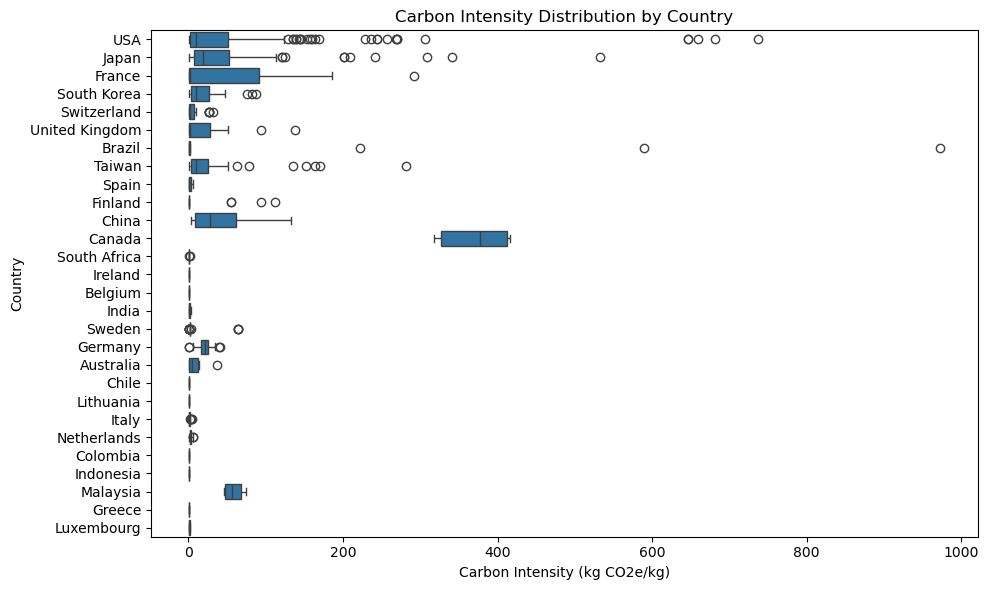

In [24]:
(f_stat_country, p_value_country) = perform_anova(df, by = "country")
visualize_ci_distribution(df, by="country")

#### 2.3 What could be the reason of these differences if any?

1. **Energy Sources:**
   - **Countries like France (60.86)**, despite reliance on nuclear power, show relatively high CI due to industrial processes.
   - **Colombia, Chile, and Sweden:** Rely heavily on hydroelectric or renewable energy sources, leading to low CI.

2. **Economic Activities:**
   - High CI in Canada and Brazil reflects heavy reliance on extractive industries (e.g., mining, agriculture, oil sands).
   - USA and China are major industrial economies, with high emissions tied to large-scale manufacturing and fossil fuel energy use.

3. **Technology and Infrastructure:**
   - Countries with access to efficient, low-carbon technology (e.g., Sweden, Germany) tend to have lower CI compared to those with outdated systems.

4. **Geographical Factors:**
   - **Transport-related emissions** in geographically large countries (e.g., Canada, USA) may be higher due to long transportation routes.

5. **Environmental Regulations:**
   - Strict regulations in Europe (e.g., Belgium, Germany) generally lead to more efficient processes, reflected in moderate CI.

###   

## 3rd Question:

#### Are there significant differences in CI contributions among the three value chain portions (upstream, direct operations, downstream) within sectors?

In [25]:
avg_contributions = calculate_average_ci(df, group_by = 'stream')
avg_contributions

,upstream co2e (fraction of total pcf),operations co2e (fraction of total pcf),downstream co2e (fraction of total pcf)
company's sector,,,
Packaging for consumer goods,0.86,0.13,0.02
"Home durables, textiles, & equipment",0.49,0.12,0.38
Food & Beverage,0.53,0.28,0.19
Construction & commercial materials,0.25,0.69,0.06
"Computer, IT & telecom",0.40,0.15,0.45
Comm. equipm. & capital goods,0.33,0.07,0.60
Chemicals,0.59,0.31,0.10
Automobiles & components,0.14,0.04,0.82


#### 3.1 Interpretation of Results: ANOVA on CI Contributions Across Value Chain Portions within Sectors

1. **Significant Differences**: All sectors exhibit significant differences (p < 0.05) in contributions from upstream, operations, and downstream stages.
2. **Dominant Stages**:
   - **Upstream Dominance**: Sectors like Chemicals and Food & Beverage show higher upstream emissions due to raw material extraction and processing.
   - **Downstream Dominance**: Sectors like Automobiles & Components have significant downstream emissions from product usage.
   - **Operational Dominance**: Construction materials have high operational emissions, reflecting manufacturing intensity.
3. **Packaging for Consumer Goods**: This sector has the highest F-statistic, indicating extremely skewed contributions, likely due to minimal downstream impact compared to upstream and operations.

In [26]:
# 2. Perform ANOVA for within-sector differences
anova_results_within_sector = perform_anova(df, by='stream')
anova_results_within_sector.columns = ['F-Stat', 'P-values']
anova_results_within_sector

,F-Stat,P-values
Food & Beverage,54.970641,7.105978e-20
Comm. equipm. & capital goods,21.634163,1.471944e-08
"Computer, IT & telecom",45.939819,5.556291e-19
Chemicals,28.356784,1.009946e-10
Construction & commercial materials,669.158737,7.802478e-69
"Home durables, textiles, & equipment",24.807485,1.662503e-09
Packaging for consumer goods,2316.407406,4.491989e-66
Automobiles & components,287.166134,1.345690e-21


<Figure size 1000x600 with 0 Axes>

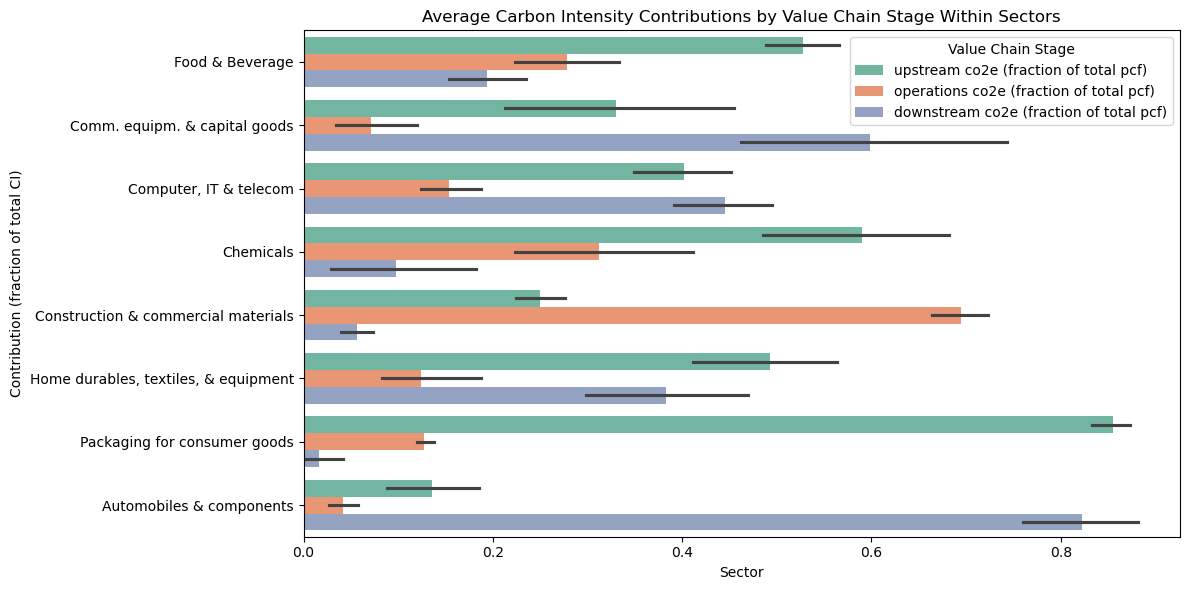

In [27]:
visualize_ci_distribution(df, by='stream')

#### 3.2 **Implications**
- **Focus on High Impact Areas**: Companies should target the dominant CI contributors (e.g., upstream for Chemicals, downstream for Automobiles).
- **Sector-Specific Strategies**: Policies to reduce emissions need to be tailored for each sector’s unique value chain structure.
- **Opportunities for Optimization**:
  - Transition to low-carbon raw materials for upstream-intensive sectors.
  - Improve energy efficiency in operations for manufacturing-heavy industries.
  - Enhance product design for reduced downstream emissions.

###  

## 4th Question:

#### Which value chain portion contributes the most to CI variability across sectors?


#### In other words: Determine which of the three value chain portions (upstream, operations, downstream) drives the largest differences in CI between sectors.

In [36]:
file_path = 'C:\\Users\\ASUS\\OneDrive\\Desktop\\CarbonCatalogueDataDescriptor_v30Oct2021.xlsx'
stage_level_data = pd.read_excel(file_path, sheet_name='Stage Level Data')
ci_variability = stage_level_data.groupby('*Assigned value chain portion')['Emissions at stage (kg CO2e)'].std()
ci_variability_sorted = ci_variability.sort_values(ascending=False)
print("CI Variability by Value Chain Portion (Standard Deviation):")
print(ci_variability_sorted)

CI Variability by Value Chain Portion (Standard Deviation):
*Assigned value chain portion
Downstream    8255.058805
Operations    3713.311200
Upstream       963.792025
Name: Emissions at stage (kg CO2e), dtype: float64


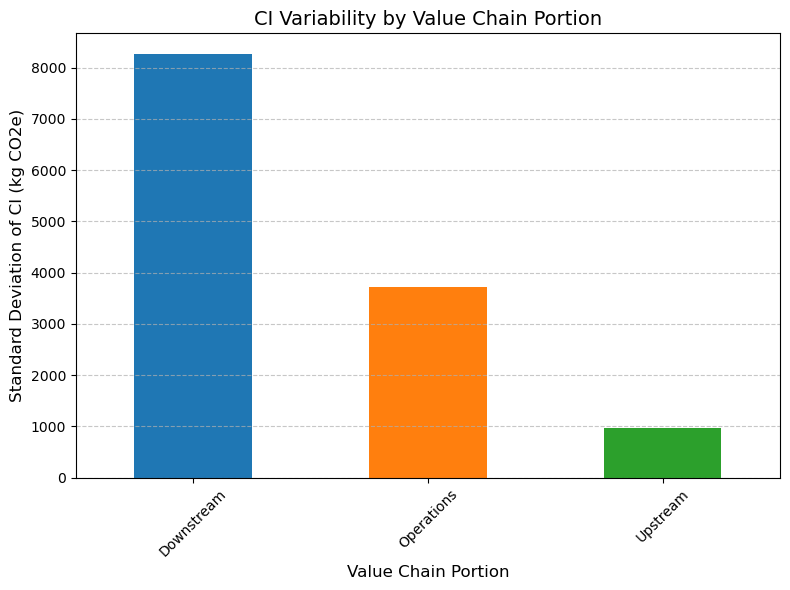

In [37]:
plt.figure(figsize=(8, 6))
ci_variability.sort_values(ascending=False).plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('CI Variability by Value Chain Portion', fontsize=14)
plt.xlabel('Value Chain Portion', fontsize=12)
plt.ylabel('Standard Deviation of CI (kg CO2e)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### ***This indicates that the Downstream portion of the value chain contributes the most to CI variability across sectors.***

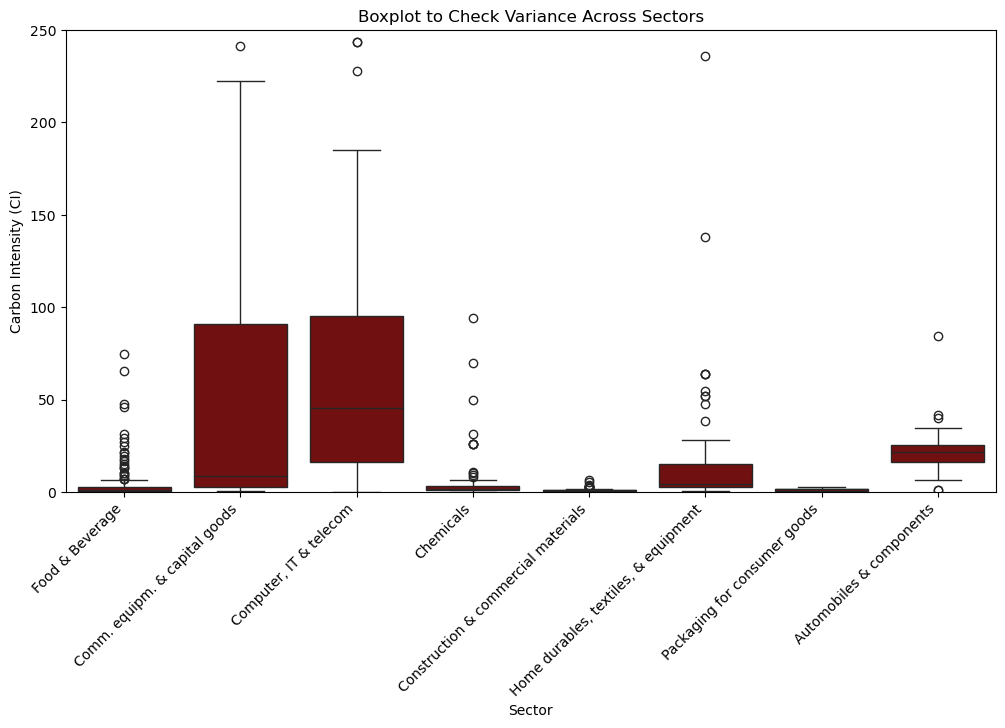

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="company's sector", y='carbon intensity', data=df, color='maroon')
plt.title('Boxplot to Check Variance Across Sectors')
plt.xlabel('Sector')
plt.ylabel('Carbon Intensity (CI)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 250)
plt.show()

#### ***By examining the Carbon Intensity across sectors we can find out than in general Upstream CO2e has the most portion such sectors are Chemicals and Computer, IT and Telecom and then in some sectors like Comm. equipm. & capital goods and Home durables also the Downstream CO2e plays a key role!***
### *Downstream CO2e Comm. equipment and capital goods has the highest variance among all the sectors.*

###  

### ***In conclusion, we sum up some key understandings:***
- **Differences in Carbon Intensity levels among the countries: based on the industry and sector established in each country, the CI levels vary!**
- **Difference in Carbon Intensity levels among the sectors: based on the materials and facilities used for each specific sector, the CI levels differentiate!**
- **Contribution of Value chain (Upstream, Downstream, Operations) to Carbon Intensity levels: each element of this value chain contributes as a portion to the whole CI levels, but Upstream has the greatest impact!**

### Further inspections and analyses could help in finding more sustainable solutions out of this dataset!